In [0]:
from keras.datasets import reuters
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import copy

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 113us/step - loss: 2.3902 - acc: 0.5049 - val_loss: 1.5406 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 78us/step - loss: 1.3300 - acc: 0.7005 - val_loss: 1.2796 - val_acc: 0.7300
Epoch 3/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.0282 - acc: 0.7671 - val_loss: 1.1336 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.8069 - acc: 0.8215 - val_loss: 1.0795 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.6355 - acc: 0.8544 - val_loss: 1.0112 - val_acc: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.4791 - acc: 0.8943 - val_loss: 0.9722 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.3939 - acc: 0.9169 - val_loss: 0.9576 - val_acc: 0.8020
Epoch 8/9
798

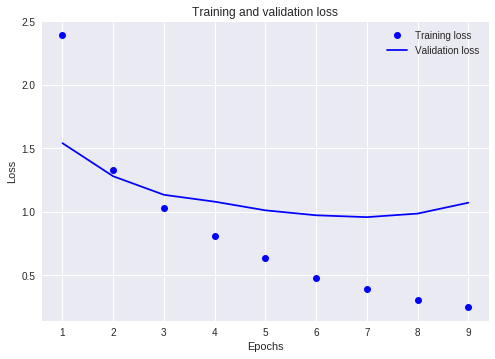

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

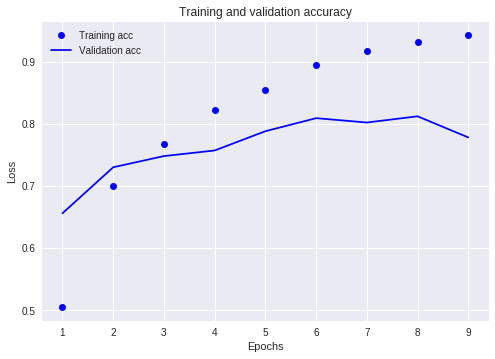

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 152us/step


In [29]:
results

[1.205018838175895, 0.7577916295902068]

In [30]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/ len(test_labels))

0.1772039180765806

In [0]:
predictions = model.predict(x_test)

In [0]:
#when integer label use:
#model.compile(...., loss="sparse_categorical_crossentropy", ....)